In [69]:
print("hello")

hello


In [70]:
chemin_du_fichier_csv="C:/Users/dell/Desktop/acp/cancer.csv"

In [71]:
import numpy as np

# Création d'une matrice 3x3 avec des valeurs initiales
matrice = np.array([
    [12.04,23.7,5.9],
    [17.18,15.5,-1.8],
    [11.83,13.1,2.8],
    [6.23,13.5,-2.4],
    [16.99,21.1,7.2],
    [3.87,20.30,-0.90],
   
])
print(matrice)


[[12.04 23.7   5.9 ]
 [17.18 15.5  -1.8 ]
 [11.83 13.1   2.8 ]
 [ 6.23 13.5  -2.4 ]
 [16.99 21.1   7.2 ]
 [ 3.87 20.3  -0.9 ]]


In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()
matrice_centree_reduite = scaler.fit_transform(matrice)
matrice_centree_reduite

array([[ 0.13727683,  1.44490001,  1.09020449],
       [ 1.16986645, -0.58621658, -0.95725273],
       [ 0.09508932, -1.18068972,  0.26590354],
       [-1.02991105, -1.08161087, -1.11679485],
       [ 1.1316968 ,  0.80088743,  1.43587909],
       [-1.50401834,  0.60272972, -0.71793955]])

In [74]:
matrice_correlation = np.corrcoef(matrice_centree_reduite, rowvar=False)
matrice_correlation

array([[1.        , 0.08568223, 0.48500999],
       [0.08568223, 1.        , 0.62460597],
       [0.48500999, 0.62460597, 1.        ]])

In [75]:
valeurs_propres, vecteurs_propres= np.linalg.eig(matrice_correlation)
valeurs_propres


array([1.83365492, 0.9170488 , 0.24929629])

In [76]:
# Calcul de l'inertie totale
inertie_totale = np.sum(valeurs_propres)
inertie_expliquee = (valeurs_propres / inertie_totale)
inertie_expliquee

array([0.61121831, 0.30568293, 0.08309876])

In [77]:
vecteurs_propres

array([[-0.45816666, -0.79130318, -0.40487355],
       [-0.56265318,  0.61080835, -0.5570768 ],
       [-0.68811678,  0.02743063,  0.72508127]])

In [78]:
composantes_principales = np.dot(matrice_centree_reduite, vecteurs_propres)
composantes_principales

array([[-1.62606126,  0.80383439, -0.07001316],
       [ 0.45254448, -1.31004306, -0.84116635],
       [ 0.43777939, -0.78912572,  0.81203737],
       [ 1.84892798,  0.12368055,  0.20975703],
       [-1.95718011, -0.36693947,  0.13677914],
       [ 0.84398952,  1.53859331, -0.24739402]])

In [79]:
import pandas as pd

vecteurs_pondere =-1* vecteurs_propres * np.sqrt(valeurs_propres)

data_frame = pd.DataFrame(vecteurs_pondere)
data_frame

,0,1,2
0,0.620415,0.757773,0.202152
1,0.761903,-0.584926,0.278146
2,0.931796,-0.026268,-0.362030


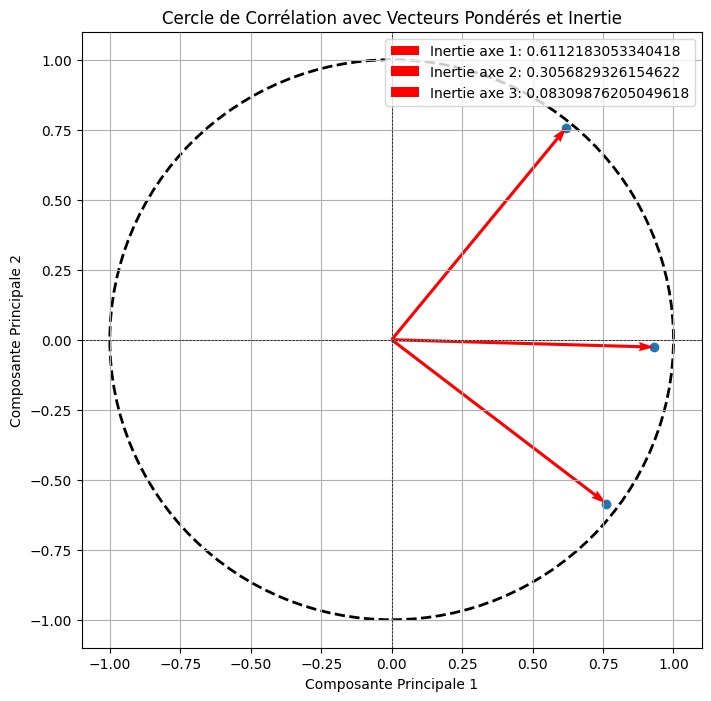

In [80]:
import matplotlib.pyplot as plt
# Tracer les vecteurs pondérés
plt.figure(figsize=(8, 8))
plt.scatter(vecteurs_pondere[:, 0], vecteurs_pondere[:, 1])

# Ajouter un cercle de rayon 1
cercle = plt.Circle((0, 0), 1, edgecolor='black', facecolor='none', linestyle='--', linewidth=2)
plt.gca().add_patch(cercle)

for i, (x, y) in enumerate(zip(vecteurs_pondere[:, 0], vecteurs_pondere[:, 1])):
    # Calcul de l'inertie expliquée pour la composante principale actuelle
    inertie_exp = inertie_expliquee[i]

    # Ajouter le texte avec l'inertie de la composante principale
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='red', width=0.005,
               label=f'Inertie axe {i + 1}: {inertie_exp:}')

plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.title('Cercle de Corrélation avec Vecteurs Pondérés et Inertie')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.legend()  # Afficher la légende avec les labels
plt.grid(True)
plt.show()
#rkia bouzid